# Pandas
[Pandas](http://pandas.pydata.org/pandas-docs/stable/index.html) is a powerful libary for data exploring / handling.<br>
Below you will find some useful functions to work with pandas, especially with dataframes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

#### Load data

In [2]:
datapoints = datasets.load_iris()

## Create DataFrame

In [3]:
df_data = pd.DataFrame(datapoints.data)
df_data.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Change column names

In [4]:
df_data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
df_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Reordering column names

In [5]:
df_data = df_data[['petal_length', 'petal_width', 'sepal_length', 'sepal_width']]
df_data.head()

,petal_length,petal_width,sepal_length,sepal_width
0,1.4,0.2,5.1,3.5
1,1.4,0.2,4.9,3.0
2,1.3,0.2,4.7,3.2
3,1.5,0.2,4.6,3.1
4,1.4,0.2,5.0,3.6


## Drop columns

In [6]:
df_data.drop(columns=['sepal_length', 'petal_length']).head()

,petal_width,sepal_width
0,0.2,3.5
1,0.2,3.0
2,0.2,3.2
3,0.2,3.1
4,0.2,3.6


## Indexing

#### Label-based indexing

In [7]:
df_data.loc[[0,1,3], ['sepal_length']]

,sepal_length
0,5.1
1,4.9
3,4.6


#### Positional indexing

In [8]:
df_data.iloc[[0, 1, 3], [0, 1]]

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
3,1.5,0.2


## Generate descriptive statistics
[Docs](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)

In [9]:
df_data.describe()

,petal_length,petal_width,sepal_length,sepal_width
count,150.000000,150.000000,150.000000,150.000000
mean,3.758000,1.199333,5.843333,3.057333
std,1.765298,0.762238,0.828066,0.435866
min,1.000000,0.100000,4.300000,2.000000
25%,1.600000,0.300000,5.100000,2.800000
50%,4.350000,1.300000,5.800000,3.000000
75%,5.100000,1.800000,6.400000,3.300000
max,6.900000,2.500000,7.900000,4.400000


## Correlation
[Docs](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)

In [10]:
corr_ = df_data.corr()
corr_

,petal_length,petal_width,sepal_length,sepal_width
petal_length,1.000000,0.962865,0.871754,-0.428440
petal_width,0.962865,1.000000,0.817941,-0.366126
sepal_length,0.871754,0.817941,1.000000,-0.117570
sepal_width,-0.428440,-0.366126,-0.117570,1.000000


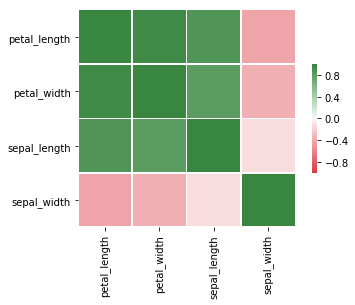

In [11]:
cmap = sns.diverging_palette(h_neg=10, h_pos=130, as_cmap=True)
sns.heatmap(corr_, cmap=cmap, vmax=1., vmin= -1., center=0, square=True, linewidths=.5, cbar_kws={"shrink":.5})
plt.show()

## Concatenate two DataFrames

In [12]:
df_target = pd.DataFrame(datapoints.target)
df_target.columns = ['target']

df_conc = pd.concat([df_data, df_target], axis=1)
df_conc.head()

,petal_length,petal_width,sepal_length,sepal_width,target
0,1.4,0.2,5.1,3.5,0
1,1.4,0.2,4.9,3.0,0
2,1.3,0.2,4.7,3.2,0
3,1.5,0.2,4.6,3.1,0
4,1.4,0.2,5.0,3.6,0


## Inspect unique values

In [13]:
# For all colums
df_conc.nunique()

petal_length    43
petal_width     22
sepal_length    35
sepal_width     23
target           3
dtype: int64

In [14]:
# For one specific column
df_conc.target.unique()

array([0, 1, 2])

## Visualizing categories

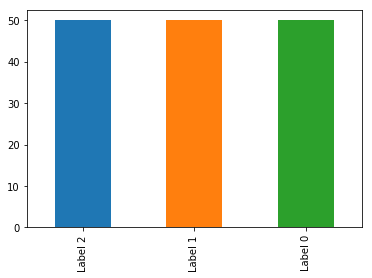

In [43]:
values = df_conc['target'].value_counts()

values.index = ['Label 2', 'Label 1', 'Label 0']
values.plot(kind='bar')
plt.show()

## Data types

In [15]:
df_conc.dtypes

petal_length    float64
petal_width     float64
sepal_length    float64
sepal_width     float64
target            int64
dtype: object

In [16]:
import numpy as np

# Changing type of one column
df_conc[['target']] = df_conc[['target']].astype(np.float64)
df_conc.head()

,petal_length,petal_width,sepal_length,sepal_width,target
0,1.4,0.2,5.1,3.5,0.0
1,1.4,0.2,4.9,3.0,0.0
2,1.3,0.2,4.7,3.2,0.0
3,1.5,0.2,4.6,3.1,0.0
4,1.4,0.2,5.0,3.6,0.0


In [17]:
df_conc.dtypes

petal_length    float64
petal_width     float64
sepal_length    float64
sepal_width     float64
target          float64
dtype: object

## Add feature by given columns

In [18]:
# multiply two values
def multiply(length, width):
    return length * width

# Add new columns
df_data["multi"] = df_data[["sepal_length", "sepal_width"]].apply(lambda x: multiply(x["sepal_length"], x["sepal_width"]), axis=1)
df_data.head()

,petal_length,petal_width,sepal_length,sepal_width,multi
0,1.4,0.2,5.1,3.5,17.85
1,1.4,0.2,4.9,3.0,14.70
2,1.3,0.2,4.7,3.2,15.04
3,1.5,0.2,4.6,3.1,14.26
4,1.4,0.2,5.0,3.6,18.00


## Where [1.4, 1.3] is not in `petal_length`

In [19]:
arr = [1.4, 1.3]

# Get indices where petal_length is 1.4 or 1.3 
index_ = df_data[df_data.petal_length.isin(arr)].index

# Drop all rows by index where petal_length is 1.4 or 1.3 
df_data.drop(index=index_).head()

,petal_length,petal_width,sepal_length,sepal_width,multi
3,1.5,0.2,4.6,3.1,14.26
5,1.7,0.4,5.4,3.9,21.06
7,1.5,0.2,5.0,3.4,17.00
9,1.5,0.1,4.9,3.1,15.19
10,1.5,0.2,5.4,3.7,19.98


## Selecting specific rows

In [23]:
df_data[["petal_length", "petal_width"]].head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
